In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import collections
path = r'C:\Users\chris\Documents\GitHub\cs4300sp2021-rad338-jsh328-rpp62-cmc447\sample_data'

In [4]:
lyrics = pickle.load(open(path + r'\sample5000_SAFApril2019_lyrics.pkl', 'rb'))
df = pd.read_csv(path + r'\sample5000_SAFApril2019.csv')
df = df.set_index('track_id').loc[list(lyrics.keys())].reset_index()

In [5]:
df

,track_id,artist_name,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,2HXdAom65IM8wY5S2QhHpo,Soulja Boy,Fresh out the Trap,0.681000,0.796,153936,0.477,0.000000,8,0.5550,-10.670,1,0.3690,130.076,4,0.815,28
1,1Xy2tuw1Z2RvFiJEI538DT,Mokita,When I See You,0.460000,0.649,203843,0.568,0.000000,10,0.0933,-10.051,1,0.0496,116.793,4,0.325,64
2,4ofrzpGb8W70sjzaVrFoh1,Remedy Drive,I Don't Belong to You,0.143000,0.595,218160,0.758,0.458000,0,0.0601,-6.278,1,0.0583,161.956,4,0.710,15
3,37Ph6K7yrjpwHJCBrEFb18,Armin van Buuren,"A State Of Trance (ASOT 853) - Track Recap, Pt. 1",0.183000,0.520,34652,0.632,0.000000,11,0.6500,-10.641,0,0.2280,65.354,4,0.715,6
4,3WljEX77ZEkGN8bP3dBY50,Waka Flocka Flame,Luv Da Gun Sound,0.128000,0.516,215616,0.776,0.000000,7,0.3330,-6.854,1,0.2780,140.058,4,0.527,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,6dS5dbyAXpCStP3AU0J3dI,August Alsina,Forever and A Day,0.218000,0.733,174817,0.569,0.000000,11,0.3270,-8.799,1,0.0587,135.026,4,0.808,54
658,2701tttWBrUlNIiuQzZZF4,Armin van Buuren,A State Of Trance (ASOT 889) - Interview with ...,0.383000,0.611,43540,0.578,0.000000,6,0.3530,-10.804,0,0.3280,77.159,4,0.882,10
659,1fyhyOy6iS9E2NckAzjmTo,Zé Neto & Cristiano,Status Que Eu Não Queria - Ao Vivo,0.590000,0.580,153934,0.871,0.000000,4,0.5640,-4.052,1,0.2090,117.622,4,0.911,74
660,4HQMmxKRdEqPWAesuBZyOv,Bon Jovi,We Don't Run,0.000126,0.442,198333,0.928,0.000004,8,0.3280,-3.660,0,0.0671,156.013,4,0.450,27


In [6]:
df.columns

Index(['track_id', 'artist_name', 'track_name', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence',
       'popularity'],
      dtype='object')

## Continuous features

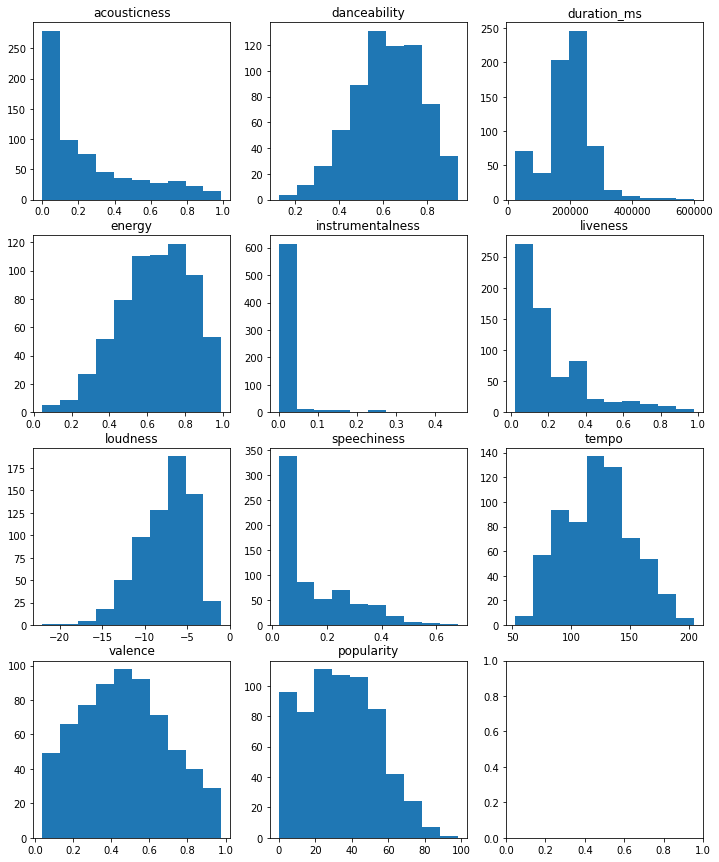

In [27]:
cont_cols = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness',
       'loudness', 'speechiness', 'tempo', 'valence','popularity']
fig, axs = plt.subplots(4,3, figsize = (12,15)) 
for i, col in enumerate(cont_cols):
    row_ix, col_ix = int(i/3), i - (3 * int(i/3))
    axs[row_ix, col_ix].hist(df[col])
    axs[row_ix, col_ix].set_title(col)
    

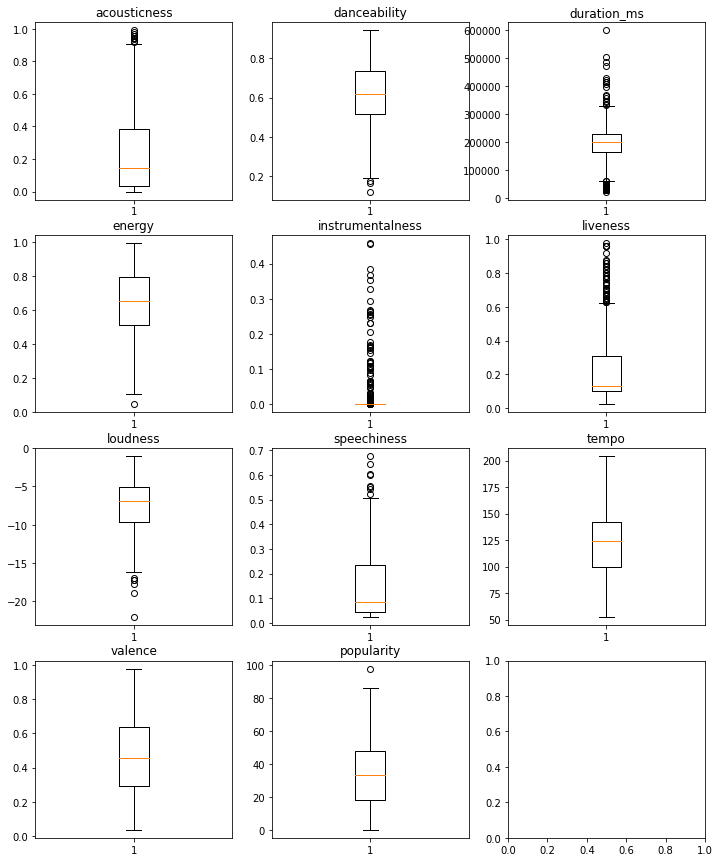

In [28]:
fig, axs = plt.subplots(4,3, figsize = (12,15)) 
for i, col in enumerate(cont_cols):
    row_ix, col_ix = int(i/3), i - (3 * int(i/3))
    axs[row_ix, col_ix].boxplot(df[col])
    axs[row_ix, col_ix].set_title(col)

## Categorical features

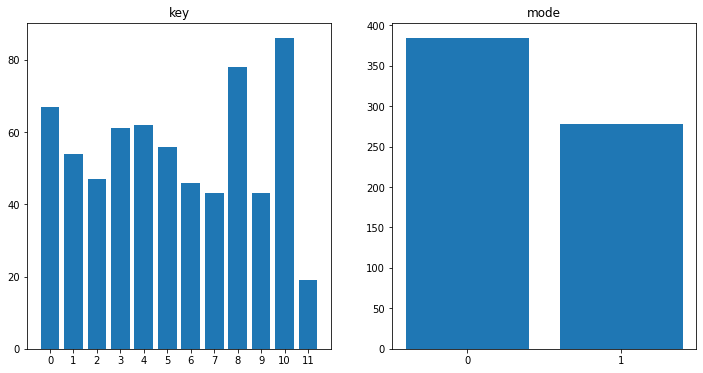

In [49]:
cont_cols = ['key', 'mode']

fig, axs = plt.subplots(1,2, figsize = (12, 6))
axs[0].bar(df['key'].unique(), df.groupby('key')['key'].count())
axs[0].set_title('key')
axs[0].set_xticks(list(range(12))) 
axs[0].set_xticklabels(list(range(12)))

axs[1].bar(df['mode'].unique(), df.groupby('mode')['mode'].count())
axs[1].set_title('mode')
axs[1].set_xticks([0, 1]) 
axs[1].set_xticklabels([0, 1])
plt.show()

## Lyrics

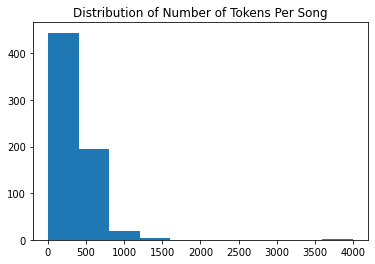

In [93]:
n_tokens = {k:sum(cnt.values()) for k,cnt in lyrics.items()}
plt.hist(n_tokens.values())
plt.title("Distribution of Number of Tokens Per Song")
plt.show()

In [97]:
pd.Series(n_tokens.values()).describe()

count     661.000000
mean      366.052950
std       238.399096
min         4.000000
25%       240.000000
50%       339.000000
75%       450.000000
max      3997.000000
dtype: float64

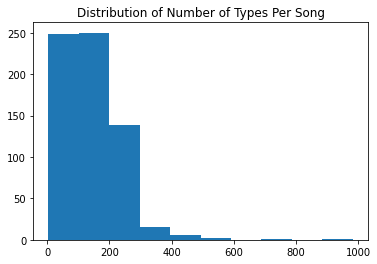

In [94]:
n_types = {k:len(cnt) for k,cnt in lyrics.items()}
plt.hist(n_types.values())
plt.title("Distribution of Number of Types Per Song")
plt.show()

In [98]:
pd.Series(n_types.values()).describe()

count    661.000000
mean     147.573374
std       92.836984
min        4.000000
25%       87.000000
50%      119.000000
75%      198.000000
max      983.000000
dtype: float64

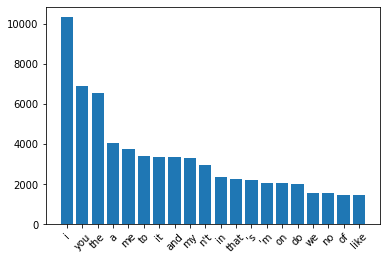

In [78]:
total_cnt = collections.Counter()
for cnt in lyrics.values():
    total_cnt += cnt
most_common = total_cnt.most_common(20)
plt.bar([x[0] for x in most_common], [x[1] for x in most_common])
plt.xticks(rotation = 45)
plt.title("Frequency of Tokens")
plt.show()

In [79]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

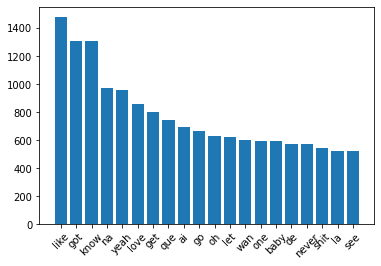

In [85]:
nonstop_words = collections.Counter(dict([(k,v) for k,v in total_cnt.items() if k not in stopwords and k.isalpha()]))
ns_most_common = nonstop_words.most_common(20)
plt.bar([x[0] for x in ns_most_common], [x[1] for x in ns_most_common])
plt.xticks(rotation = 45)
plt.tiel("Frequency of Non-stopword Tokens")
plt.show()